There might be a problem with computing the zero-point using different parameters from the ones used to get the stars in the clusters...

# Astrophysics Laboratory: Data analysis - Stellar clusters
## 58Aql Data:
Need to have a folder called `All_Images`, with all the images of the night inside.

In [1]:
import os

if not os.path.exists('./Calibrated&Aligned_Lights'):
   os.makedirs('./Calibrated&Aligned_Lights')
if not os.path.exists('./Calibration_Frames'):
   os.makedirs('./Calibration_Frames')
if not os.path.exists('./Stacks'):
   os.makedirs('./Stacks')

### Master bias creation

Verification: biasFiles = ['bias_good_2023-09-19_18-53-10_0000.fits', 'bias_good_2023-09-19_18-53-12_0001.fits', 'bias_good_2023-09-19_18-53-15_0002.fits', 'bias_good_2023-09-19_18-53-17_0003.fits', 'bias_good_2023-09-19_18-53-20_0004.fits', 'bias_good_2023-09-19_18-53-22_0005.fits', 'bias_good_2023-09-19_18-53-25_0006.fits', 'bias_good_2023-09-19_18-53-27_0007.fits', 'bias_good_2023-09-19_18-53-30_0008.fits', 'bias_good_2023-09-19_18-53-32_0009.fits', 'bias_good_2023-09-19_18-53-35_0010.fits', 'bias_good_2023-09-19_18-53-37_0011.fits', 'bias_good_2023-09-19_18-53-40_0012.fits', 'bias_good_2023-09-19_18-53-42_0013.fits', 'bias_good_2023-09-19_18-53-45_0014.fits', 'bias_good_2023-09-19_18-53-47_0015.fits', 'bias_good_2023-09-19_18-53-50_0016.fits', 'bias_good_2023-09-19_18-53-52_0017.fits', 'bias_good_2023-09-19_18-53-55_0018.fits', 'bias_good_2023-09-19_18-53-57_0019.fits', 'bias_good_2023-09-19_18-53-59_0020.fits', 'bias_good_2023-09-19_18-54-02_0021.fits', 'bias_good_2023-09-19_18-54

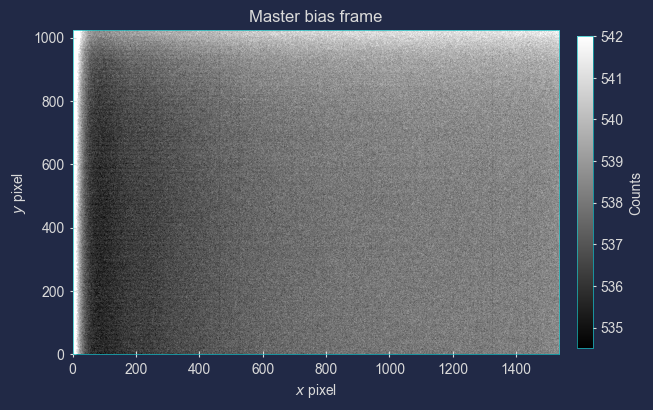

Master bias frame saved as FITS file to ./Calibration_Frames//MasterBias.fits


In [2]:
from helper_functions import masterBiasCreator

dir_bias   = "./All_Images/"
dir_saves  = "./Calibration_Frames/"
masterBias = masterBiasCreator(dir_bias, True, dir_saves, silent = False)

### Master flat (Red, Green, Blue) creation

In [ ]:
from helper_functions import masterFlatCreator

dir_flats       = "./All_Images/"
dir_saves       = "./Calibration_Frames/"
masterFlatRed   = masterFlatCreator(masterBias, dir_flats, True, dir_saves, "Red", silent = False, d = [1, 2, 3]); print()
masterFlatGreen = masterFlatCreator(masterBias, dir_flats, True, dir_saves, "Green", silent = False, d = [1, 2, 3]); print()
masterFlatBlue  = masterFlatCreator(masterBias, dir_flats, True, dir_saves, "Blue", silent = False, d = [1, 2, 3])

### Image calibration

In [ ]:
from helper_functions import generateCalibratedFrames

dir_lights  = "./All_Images/"
dir_saves   = "./Calibrated&Aligned_Lights/"
generateCalibratedFrames(masterBias, masterFlatRed, dir_lights, dir_saves, "Red",     \
                         silent = False, object = '58Aql', d = [4, 0, 0]); print()
generateCalibratedFrames(masterBias, masterFlatGreen, dir_lights, dir_saves, "Green", \
                         silent = False, object = '58Aql', d = [4, 0, 0]); print()
generateCalibratedFrames(masterBias, masterFlatBlue, dir_lights, dir_saves, "Blue",   \
                         silent = False, object = '58Aql', d = [4, 0, 0])

### Alignment of individual colours using `astroalign`

In [ ]:
from helper_functions import align_colour_frames

light_dir = "./Calibrated&Aligned_Lights/"
saves_dir = light_dir

align_colour_frames(light_dir, saves_dir, "Red", silent = False, object = '58Aql'); print()
align_colour_frames(light_dir, saves_dir, "Green", silent = False, object = '58Aql'); print()
align_colour_frames(light_dir, saves_dir, "Blue", silent = False, object = '58Aql')

### Stacking of individual colours

In [ ]:
from helper_functions import stack_colour_frames

dir_lights  = "./Calibrated&Aligned_Lights/"
dir_saves   = "./Stacks/"

_ = stack_colour_frames(dir_lights, dir_saves, 'Red', silent = False, plot_flag = True, object = '58Aql')
_ = stack_colour_frames(dir_lights, dir_saves, 'Green', silent = False, plot_flag = True, object = '58Aql')
_ = stack_colour_frames(dir_lights, dir_saves, 'Blue', silent = False, plot_flag = True, object = '58Aql')

### Alignment of the three resulting stacked light frames (R, G, B)

In [ ]:
# from helper_functions import align_3_stacked

# dir_lights  = "./Stacks/"
# dir_saves   = dir_lights

# align_3_stacked(dir_lights, dir_saves, silent = False)

### Running *'Starfinder'* algorithms

In [9]:
import helper_functions
import importlib
importlib.reload(helper_functions)

<module 'helper_functions' from 'c:\\Users\\afons\\Desktop\\Universidade\\Lab_Astrofisica\\Final_Work\\58Aql\\helper_functions.py'>

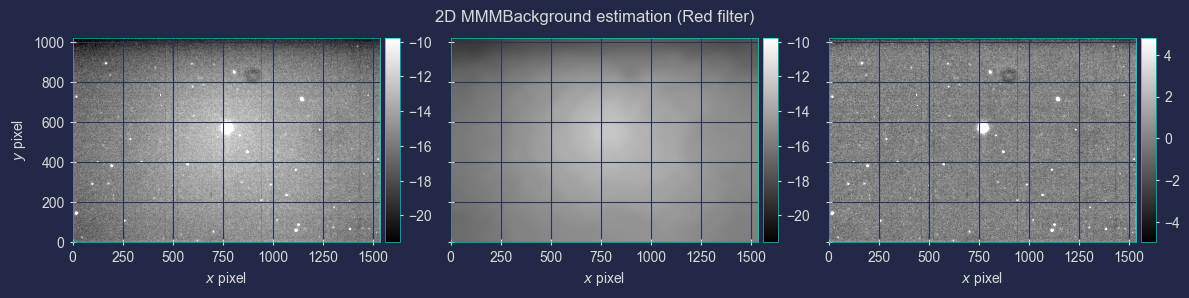

Obtained FWHM values: xfwhm = 58.084601124533506, yfwhm = 58.70313011614056.
Found 26 stars in image (Red filter).


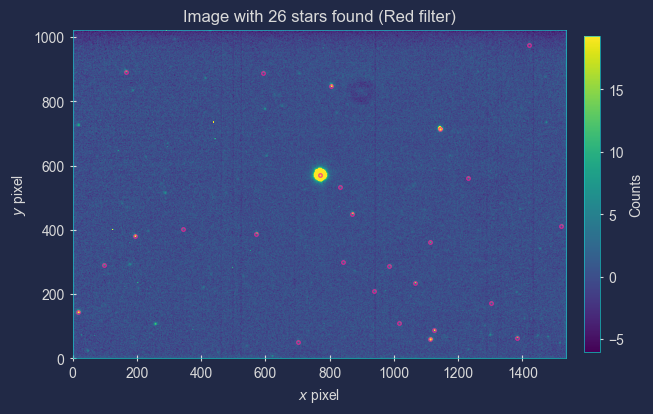

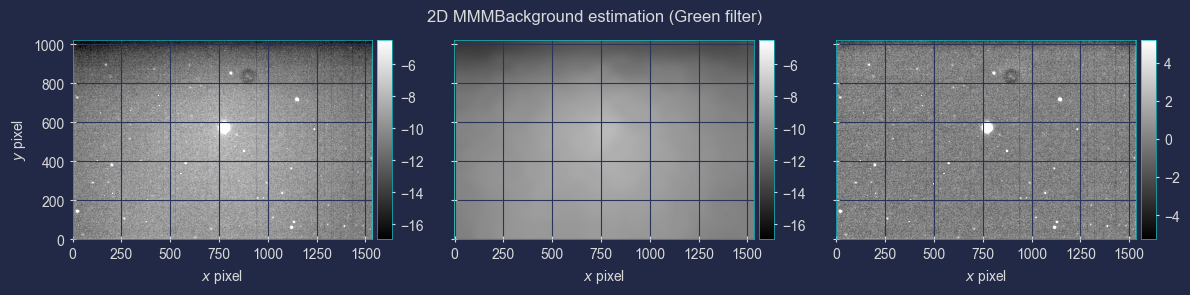

Obtained FWHM values: xfwhm = 65.56006311559342, yfwhm = 80.30180286332319.
Found 16 stars in image (Green filter).


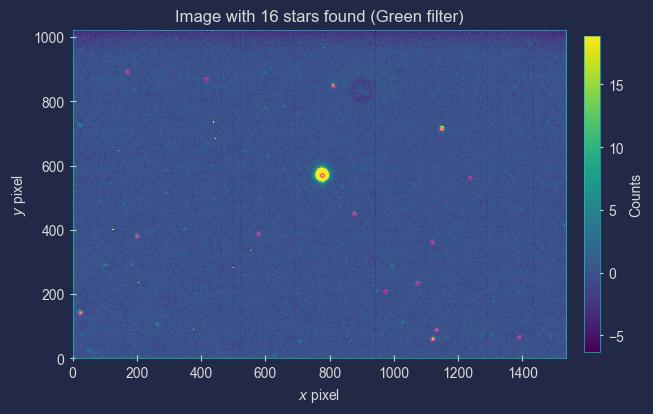

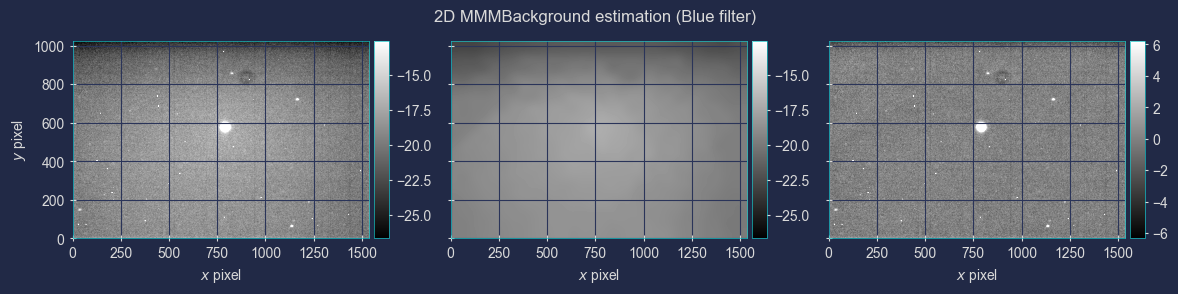

Obtained FWHM values: xfwhm = 39.76606947542048, yfwhm = 43.54408772248197.
Found 5 stars in image (Blue filter).


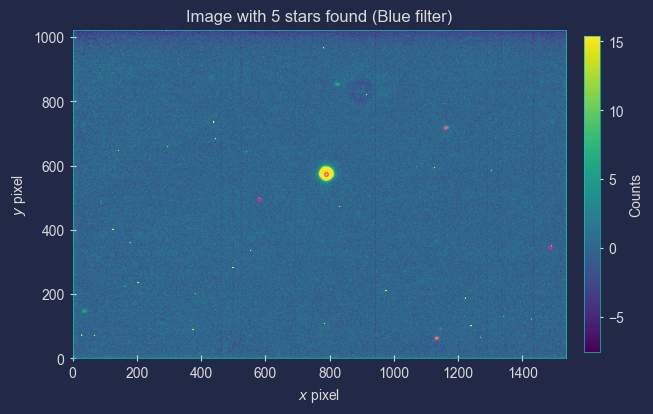

In [15]:
from helper_functions import *

dir_lights       = "./Stacks/"
blue_frame_data  = fits.open(dir_lights + "Blue_Stacked.fits")[0].data
green_frame_data = fits.open(dir_lights + "Green_Stacked.fits")[0].data
red_frame_data   = fits.open(dir_lights + "Red_Stacked.fits")[0].data


red_table   = CreateStarsTable(red_frame_data, iterative = False, filter = "Red", exp_time = 2.0, plot_bkg_flag = True, \
                               plot_stars_flag = True, fit_shape = (11, 11), threshold_sig = 10.0, aperture_radius = 12.0, \
                               grouper_dist = 15.0, model_2D = False, silent = False)

green_table = CreateStarsTable(green_frame_data, iterative = False, filter = "Green", exp_time = 3.0, plot_bkg_flag = True, \
                               plot_stars_flag = True, fit_shape = (11, 11), threshold_sig = 10.0, aperture_radius = 12.0, \
                               grouper_dist = 15.0, model_2D = False, silent = False)

blue_table  = CreateStarsTable(blue_frame_data, iterative = False, filter = "Blue", exp_time = 5.0, plot_bkg_flag = True, \
                               plot_stars_flag = True, fit_shape = (11, 11), threshold_sig = 10.0, aperture_radius = 12.0, \
                               grouper_dist = 15.0, model_2D = False, silent = False)

TODO:
- Should exclude the ones in the outskirts -> These fits are not meaningful! (I've excluded the ones outside the grid, but not yet those in the `bad` alignment regions.);

Note that this H-R diagram might need to be corrected for the distance later (so we have absolute magnitudes, instead of apparent ones).

In [16]:
# Sorting criteria: 'mag'. HIP 106049 is the brightest star in the FOV.
def get_mag(Table):
    return Table['mag']

red_sorted   = Table(rows = sorted(red_table, key   = get_mag), names = red_table.colnames)
green_sorted = Table(rows = sorted(green_table, key = get_mag), names = green_table.colnames)
blue_sorted  = Table(rows = sorted(blue_table, key  = get_mag), names = blue_table.colnames)

# HIP 106049 is the brightest star in the FOV.
magR     = red_sorted['mag'][0]
magR_err = red_sorted['mag_err'][0]

magG     = green_sorted['mag'][0]
magG_err = green_sorted['mag_err'][0]
 
magB     = blue_sorted['mag'][0]
magB_err = blue_sorted['mag_err'][0]

In [17]:
m_ZP_R     = 5.47 - magR
m_ZP_R_err = np.sqrt( 0.01**2 + magR_err**2 )

m_ZP_G     = 5.63 - magG
m_ZP_G_err = np.sqrt( 0.01**2 + magG_err**2 )

m_ZP_B     = 5.73 - magB
m_ZP_B_err = np.sqrt( 0.01**2 + magB_err**2 )

print(f'Obtained zero-points: m_ZP_R = {m_ZP_R:.3f} +/- {m_ZP_R_err:.3f}, m_ZP_G = {m_ZP_G:.3f} +/- {m_ZP_G_err:.3f}, m_ZP_B = {m_ZP_B:.3f} +/- {m_ZP_B_err:.3f}.')

Obtained zero-points: m_ZP_R = 20.872 +/- 0.045, m_ZP_G = 20.768 +/- 0.037, m_ZP_B = 19.831 +/- 0.028.
